In [1]:
%run auxStandardStructure.ipynb

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Preprocessing

In [3]:
all_releases_df = pd.read_csv('all_releases.csv')

In [4]:
X, y = generateStandardTimeSeriesStructure(all_releases_df, 2)

Generating a new dataframe without containing the last release...
... DONE!
checking class larger than window size...
DONE
Setting the features...
DONE
X: (118733, 16) y: (118733,)


In [5]:
print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=10
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 83113 X Test set: 35620
y Train set: 83113 y Test set: 35620
... DONE!
Scaling features...
... DONE!
Setting stratified k-fold...
k = 10
... DONE!



In [6]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

## Statistical Analysis

In [7]:
all_releases_df.describe()

,CountClassCoupled,CountDeclMethod,CountDeclMethodAll,CountClassDerived,CountLineCode,SumCyclomatic,PercentLackOfCohesion,MaxInheritanceTree,class_frequency,will_change,number_of_changes,release
count,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000
mean,5.747073,6.513707,10.989669,0.273352,103.106062,13.787349,20.578522,1.651251,11.395915,0.174707,27.325105,32.741315
std,8.658830,12.084357,17.917928,2.303381,754.576185,31.166179,30.626505,0.740645,10.388216,0.379718,15.532635,11.367734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000,0.000000,12.000000,2.000000,0.000000,1.000000,3.000000,0.000000,17.000000,25.000000
50%,3.000000,3.000000,4.000000,0.000000,32.000000,5.000000,0.000000,2.000000,8.000000,0.000000,31.000000,35.000000
75%,7.000000,6.000000,13.000000,0.000000,82.000000,13.000000,45.000000,2.000000,18.000000,0.000000,40.000000,42.000000
max,145.000000,294.000000,294.000000,116.000000,45517.000000,843.000000,100.000000,6.000000,49.000000,1.000000,49.000000,49.000000


0
False    67703
True     15410
Name: 0, dtype: int64

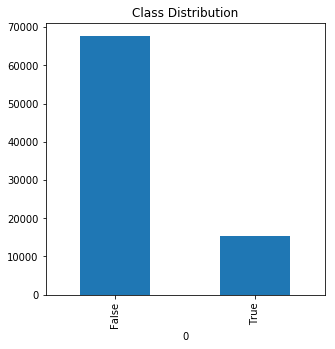

In [8]:
ax = y_train.groupby([0])[0].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby([0])[0].count()

In [9]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.064,0.48,0.42,0.58,-0.023,0.34,0.54,0.98,0.063,0.48,0.42,0.58,-0.021,0.33,0.54
1,0.064,1.0,0.19,0.16,0.12,-0.035,0.17,0.11,0.062,0.98,0.19,0.16,0.12,-0.035,0.17,0.11
2,0.48,0.19,1.0,0.8,0.83,-0.19,0.68,0.85,0.48,0.19,0.99,0.79,0.83,-0.19,0.67,0.84
3,0.42,0.16,0.8,1.0,0.67,0.16,0.54,0.67,0.42,0.16,0.79,0.99,0.67,0.16,0.54,0.67
4,0.58,0.12,0.83,0.67,1.0,-0.17,0.61,0.9,0.57,0.12,0.83,0.67,0.99,-0.16,0.6,0.88
5,-0.023,-0.035,-0.19,0.16,-0.17,1.0,-0.2,-0.14,-0.02,-0.035,-0.19,0.16,-0.16,0.98,-0.19,-0.13
6,0.34,0.17,0.68,0.54,0.61,-0.2,1.0,0.6,0.33,0.17,0.68,0.54,0.6,-0.19,0.98,0.59
7,0.54,0.11,0.85,0.67,0.9,-0.14,0.6,1.0,0.54,0.11,0.85,0.67,0.89,-0.14,0.59,0.98
8,0.98,0.062,0.48,0.42,0.57,-0.02,0.33,0.54,1.0,0.062,0.48,0.42,0.58,-0.021,0.34,0.54
9,0.063,0.98,0.19,0.16,0.12,-0.035,0.17,0.11,0.062,1.0,0.19,0.16,0.12,-0.035,0.17,0.11


## Imbalanced baseline

In [10]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6891282352660423
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7055595824119563
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6952684804675742
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7121814183849233
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6982244547604282
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6925898891644149
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6968768002515199
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6988708918320222
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6978178435419078
10 of KFold 10
ROC AUC score: 0.6911177686802006

CROSS VALIDANTION SUMMARY:
Mean: 0.697763536476099
Std deviation: 0.0065008320274106334

TEST SET:
F1-Score(micro): 0.7432902863559798
F1-Score(macro): 0.6560926217187103
F1-Score(weighted): 0.7647688368894019
F1-Score(None): [0.82926283 0.48292242]
Accuracy: 0.7432902863559798
Sensitivity: 0.6437509422584049
Specificity: 0.7660675475213027
Confusion Matrix: [0.7660675475213027, 0.64]
ROC AUC score: 0.7049092448898537
CPU times: user 27.9 s, sys: 16.1 s, total: 43.9 s
Wall time: 5.64 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [11]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

CPU times: user 14 µs, sys: 1 µs, total: 15 µs
Wall time: 5.01 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8515606169035388
2 of KFold 10
ROC AUC score: 0.8623865511877341
3 of KFold 10
ROC AUC score: 0.8582580250488039
4 of KFold 10
ROC AUC score: 0.8586512240032896
5 of KFold 10
ROC AUC score: 0.8615025348499938
6 of KFold 10
ROC AUC score: 0.8595374869279574
7 of KFold 10
ROC AUC score: 0.8522067429214469
8 of KFold 10
ROC AUC score: 0.8564405510818524
9 of KFold 10
ROC AUC score: 0.8579151637611824
10 of KFold 10
ROC AUC score: 0.8617929714346513

CROSS VALIDANTION SUMMARY:
Mean: 0.8580251868120451
Std deviation: 0.0035526182779175466

TEST SET:
F1-Score(micro): 0.9017125210555867
F1-Score(macro): 0.8374448400213926
F1-Score(weighted): 0.9015891335356301
F1-Score(None): [0.93965562 0.73523406]
Accuracy: 0.9017125210555867
Sensitivity: 0.7328508970300015
Specificity: 0.9403525718425501
Confusion Matrix: [0.9403525718425501, 0.73]
ROC AUC score: 0.8366

In [12]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8461230669292285
2 of KFold 10
ROC AUC score: 0.8445432485815034
3 of KFold 10
ROC AUC score: 0.8486740269487262
4 of KFold 10
ROC AUC score: 0.8586852520519871
5 of KFold 10
ROC AUC score: 0.8529635554805767
6 of KFold 10
ROC AUC score: 0.8485820368327268
7 of KFold 10
ROC AUC score: 0.8465638859839906
8 of KFold 10
ROC AUC score: 0.8455904920839257
9 of KFold 10
ROC AUC score: 0.8490990235387827
10 of KFold 10
ROC AUC score: 0.8538157903565469

CROSS VALIDANTION SUMMARY:
Mean: 0.8494640378787995
Std deviation: 0.004201689359246595

TEST SET:
F1-Score(micro): 0.9230207748455924
F1-Score(macro): 0.8666773619580128
F1-Score(weighted): 0.9210693403519046
F1-Score(None): [0.95334831 0.78000642]
Accuracy: 0.9230207748455924
Sensitivity: 0.7328508970300015
Specificity: 0.9665367233587471
Confusion Matrix: [0.9665367233587471, 0.73]
ROC AUC score: 0.84969381

In [13]:
%%time
NN_(X_train, y_train, X_test, y_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7294613312049297
2 of KFold 10
ROC AUC score: 0.7317012441213248
3 of KFold 10
ROC AUC score: 0.7165565902068706
4 of KFold 10
ROC AUC score: 0.7361106611314374
5 of KFold 10
ROC AUC score: 0.7346625999154571
6 of KFold 10
ROC AUC score: 0.7234963676256186
7 of KFold 10
ROC AUC score: 0.7306926768763593
8 of KFold 10
ROC AUC score: 0.7160544333754769
9 of KFold 10
ROC AUC score: 0.7324361590672288
10 of KFold 10
ROC AUC score: 0.7459848340341834

CROSS VALIDANTION SUMMARY:
Mean: 0.7297156897558886
Std deviation: 0.00860747936784824

TEST SET:
F1-Score(micro): 0.8833801235261088
F1-Score(macro): 0.7735271477322905
F1-Score(weighted): 0.8725134997515995
F1-Score(None): [0.93125703 0.61579726]
Accuracy: 0.883380123526109
Sensitivity: 0.50188451680989
Specificity: 0.9706765101597268
Confusion Matrix: [0.9706765101597268, 0.5]
ROC AUC score: 0.736280513484

## Undersampling

In [14]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 30820 30820


In [15]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7055143009985486
2 of KFold 10
ROC AUC score: 0.6922388928580879
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6865264272148943
4 of KFold 10
ROC AUC score: 0.686140434437664
5 of KFold 10
ROC AUC score: 0.6962560386473431
6 of KFold 10
ROC AUC score: 0.7046239731511236
7 of KFold 10
ROC AUC score: 0.7120179154291069
8 of KFold 10
ROC AUC score: 0.7048613710663572
9 of KFold 10
ROC AUC score: 0.7022548303363202
10 of KFold 10
ROC AUC score: 0.6941332761885554

CROSS VALIDANTION SUMMARY:
Mean: 0.6984567460328002
Std deviation: 0.008266891767853994

TEST SET:
F1-Score(micro): 0.7432622122403145
F1-Score(macro): 0.6561982087672623
F1-Score(weighted): 0.7647744282170033
F1-Score(None): [0.82920908 0.48318734]
Accuracy: 0.7432622122403144
Sensitivity: 0.6445047489823609
Specificity: 0.7658605581812536
Confusion Matrix: [0.7658605581812536, 0.64]
ROC AUC score: 0.7051826535818073
CPU times: user 11.7 s, sys: 6.16 s, total: 17.8 s
Wall time: 2.29 s


In [16]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8006930626085853
2 of KFold 10
ROC AUC score: 0.8114709851551956
3 of KFold 10
ROC AUC score: 0.7848175399634008
4 of KFold 10
ROC AUC score: 0.7864976893271372
5 of KFold 10
ROC AUC score: 0.7940356744704571
6 of KFold 10
ROC AUC score: 0.789103200368514
7 of KFold 10
ROC AUC score: 0.8275887278575903
8 of KFold 10
ROC AUC score: 0.7909738785085046
9 of KFold 10
ROC AUC score: 0.7946917466837906
10 of KFold 10
ROC AUC score: 0.8033960525283763

CROSS VALIDANTION SUMMARY:
Mean: 0.7983268557471551
Std deviation: 0.012464036773158051

TEST SET:
F1-Score(micro): 0.8894722066254913
F1-Score(macro): 0.8115940457099109
F1-Score(weighted): 0.8876120540548254
F1-Score(None): [0.932725   0.69046309]
Accuracy: 0.8894722066254913
Sensitivity: 0.6619930649781396
Specificity: 0.941525511436161
Confusion Matrix: [0.941525511436161, 0.66]
ROC AUC score: 0.8017592882

In [17]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7924979477339985
2 of KFold 10
ROC AUC score: 0.7932801460665238
3 of KFold 10
ROC AUC score: 0.7893305243931548
4 of KFold 10
ROC AUC score: 0.7652229675665677
5 of KFold 10
ROC AUC score: 0.7781339031339032
6 of KFold 10
ROC AUC score: 0.7923729394474484
7 of KFold 10
ROC AUC score: 0.7901909606665111
8 of KFold 10
ROC AUC score: 0.7716214433665957
9 of KFold 10
ROC AUC score: 0.7782625427131485
10 of KFold 10
ROC AUC score: 0.7980919526706779

CROSS VALIDANTION SUMMARY:
Mean: 0.7849005327758529
Std deviation: 0.010289769108871893

TEST SET:
F1-Score(micro): 0.8948343627175744
F1-Score(macro): 0.8083777189823613
F1-Score(weighted): 0.8891539379097605
F1-Score(None): [0.93709065 0.67966479]
Accuracy: 0.8948343627175744
Sensitivity: 0.5991255842002111
Specificity: 0.9625004312277917
Confusion Matrix: [0.9625004312277917, 0.6]
ROC AUC score: 0.780813007

In [18]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 24.8 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7420746264596895
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7243192823688179
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7209899092629299
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7373272076732904
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7462374581939799
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7433611272579708
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7490010409687775
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7531699091255878
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7521531268442245
10 of KFold 10
ROC AUC score: 0.7605010532566921

CROSS VALIDANTION SUMMARY:
Mean: 0.742913474141196
Std deviation: 0.011859565827232436

TEST SET:
F1-Score(micro): 0.8818360471645144
F1-Score(macro): 0.7728510000154221
F1-Score(weighted): 0.8715926100332879
F1-Score(None): [0.9301909 0.6155111]
Accuracy: 0.8818360471645144
Sensitivity: 0.5079149706015378
Specificity: 0.9673991789422844
Confusion Matrix: [0.9673991789422844, 0.51]
ROC AUC score: 0.7376570747719111
CPU times: user 17min 36s, sys: 9min 7s, total: 26min 44s
Wall time: 3min 23s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

Resampling dataset using Edited Nearest Neighbour (ENN)...
... DONE!
X and Y ENN: 76763 76763


In [20]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6904504244891618
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7046040519356574
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6922422604946419
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7025724392302549
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7087029245930667
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7111239181972404
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6911473589534246
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6897055236947531
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6907952251387381
10 of KFold 10
ROC AUC score: 0.7056526531097363

CROSS VALIDANTION SUMMARY:
Mean: 0.6986996779836676
Std deviation: 0.00814120135412473

TEST SET:
F1-Score(micro): 0.7435710275126334
F1-Score(macro): 0.6562342357655515
F1-Score(weighted): 0.7649747193744559
F1-Score(None): [0.82950685 0.48296162]
Accuracy: 0.7435710275126334
Sensitivity: 0.6431478968792401
Specificity: 0.7665505226480837
Confusion Matrix: [0.7665505226480837, 0.64]
ROC AUC score: 0.7048492097636618
CPU times: user 28.3 s, sys: 16.3 s, total: 44.6 s
Wall time: 5.71 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [21]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 4.77 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8508948607585624
2 of KFold 10
ROC AUC score: 0.8484607362756749
3 of KFold 10
ROC AUC score: 0.8569988384991958
4 of KFold 10
ROC AUC score: 0.8509938820895125
5 of KFold 10
ROC AUC score: 0.8639905727265565
6 of KFold 10
ROC AUC score: 0.860315637138338
7 of KFold 10
ROC AUC score: 0.8541314621271411
8 of KFold 10
ROC AUC score: 0.8591251161155883
9 of KFold 10
ROC AUC score: 0.8485185367040229
10 of KFold 10
ROC AUC score: 0.8506239396661344

CROSS VALIDANTION SUMMARY:
Mean: 0.8544053582100727
Std deviation: 0.005139446403724529

TEST SET:
F1-Score(micro): 0.8759685569904548
F1-Score(macro): 0.8043391742829866
F1-Score(weighted): 0.8786340527649255
F1-Score(None): [0.92272441 0.68595394]
Accuracy: 0.8759685569904548
Sensitivity: 0.7274234886175185
Specificity: 0.9099596370786904
Confusion Matrix: [0.9099596370786904, 0.73]
ROC AUC score: 0.81869156

In [22]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8418205618707771
2 of KFold 10
ROC AUC score: 0.8453695754307586
3 of KFold 10
ROC AUC score: 0.8500374081989749
4 of KFold 10
ROC AUC score: 0.8403167943214473
5 of KFold 10
ROC AUC score: 0.8524240622432635
6 of KFold 10
ROC AUC score: 0.8493610952703745
7 of KFold 10
ROC AUC score: 0.8486651769088365
8 of KFold 10
ROC AUC score: 0.8526123317444776
9 of KFold 10
ROC AUC score: 0.843699484666704
10 of KFold 10
ROC AUC score: 0.8453528872267843

CROSS VALIDANTION SUMMARY:
Mean: 0.8469659377882399
Std deviation: 0.004077217602387186

TEST SET:
F1-Score(micro): 0.916058394160584
F1-Score(macro): 0.8551494497243691
F1-Score(weighted): 0.9140964816720332
F1-Score(None): [0.94907865 0.76122025]
Accuracy: 0.916058394160584
Sensitivity: 0.7185285692748379
Specificity: 0.9612584951874978
Confusion Matrix: [0.9612584951874978, 0.72]
ROC AUC score: 0.83989353223

In [23]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7302077074315239
2 of KFold 10
ROC AUC score: 0.7170085726138798
3 of KFold 10
ROC AUC score: 0.720563683947935
4 of KFold 10
ROC AUC score: 0.7196080319243932
5 of KFold 10
ROC AUC score: 0.7316887030277567
6 of KFold 10
ROC AUC score: 0.7212990509904346
7 of KFold 10
ROC AUC score: 0.7035132359296755
8 of KFold 10
ROC AUC score: 0.7162070013664876
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7603016711788666
10 of KFold 10
ROC AUC score: 0.7160290960226785

CROSS VALIDANTION SUMMARY:
Mean: 0.7236426754433631
Std deviation: 0.014301862752174852

TEST SET:
F1-Score(micro): 0.8801516002245929
F1-Score(macro): 0.7595032123951522
F1-Score(weighted): 0.8664029730491343
F1-Score(None): [0.92984273 0.5891637 ]
Accuracy: 0.8801516002245929
Sensitivity: 0.46148047640584955
Specificity: 0.9759547383309759
Confusion Matrix: [0.9759547383309759, 0.46]
ROC AUC score: 0.7187176073684127
CPU times: user 18min 37s, sys: 9min 36s, total: 28min 13s
Wall time: 3min 35s


In [24]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y TL:", len(X_TL), len(y_TL))

Resampling dataset using Tomek's Link (TL)...
... DONE!
X and Y TL: 82020 82020


In [25]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6903862424107545
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7031197051025028
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6986017966975245
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7097900012139349
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6974747439637782
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6918007939443058
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6998676059909634
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6970390489309927
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6984693488990269
10 of KFold 10
ROC AUC score: 0.692775787492051

CROSS VALIDANTION SUMMARY:
Mean: 0.6979325074645836
Std deviation: 0.005423389474000861

TEST SET:
F1-Score(micro): 0.7437394722066255
F1-Score(macro): 0.6563818162065003
F1-Score(weighted): 0.7651119410520905
F1-Score(None): [0.82963792 0.48312571]
Accuracy: 0.7437394722066255
Sensitivity: 0.6431478968792401
Specificity: 0.7667575119881326
Confusion Matrix: [0.7667575119881326, 0.64]
ROC AUC score: 0.7049527044336863
CPU times: user 30.5 s, sys: 17.2 s, total: 47.8 s
Wall time: 6.15 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [26]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8536106494854111
2 of KFold 10
ROC AUC score: 0.8516580798608866
3 of KFold 10
ROC AUC score: 0.8505003351238007
4 of KFold 10
ROC AUC score: 0.8650449518755888
5 of KFold 10
ROC AUC score: 0.8483103552906156
6 of KFold 10
ROC AUC score: 0.8596037556949176
7 of KFold 10
ROC AUC score: 0.8519790721374905
8 of KFold 10
ROC AUC score: 0.850155797209457
9 of KFold 10
ROC AUC score: 0.8561757921036534
10 of KFold 10
ROC AUC score: 0.8608734810891875

CROSS VALIDANTION SUMMARY:
Mean: 0.854791226987101
Std deviation: 0.005179086708862637

TEST SET:
F1-Score(micro): 0.8992981471083661
F1-Score(macro): 0.8331983954991179
F1-Score(weighted): 0.8990947451166149
F1-Score(None): [0.93820099 0.7281958 ]
Accuracy: 0.8992981471083661
Sensitivity: 0.7244082617216946
Specificity: 0.9393176251423052
Confusion Matrix: [0.9393176251423052, 0.72]
ROC AUC score: 0.831862943

In [27]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8471431518565838
2 of KFold 10
ROC AUC score: 0.8465915051700476
3 of KFold 10
ROC AUC score: 0.8462118163234175
4 of KFold 10
ROC AUC score: 0.8568530296819481
5 of KFold 10
ROC AUC score: 0.8518920082743081
6 of KFold 10
ROC AUC score: 0.8491245170631142
7 of KFold 10
ROC AUC score: 0.8411837073033808
8 of KFold 10
ROC AUC score: 0.8445344283591714
9 of KFold 10
ROC AUC score: 0.852295730980791
10 of KFold 10
ROC AUC score: 0.8573332409896721

CROSS VALIDANTION SUMMARY:
Mean: 0.8493163136002435
Std deviation: 0.004974052260305592

TEST SET:
F1-Score(micro): 0.920943290286356
F1-Score(macro): 0.8635445833991016
F1-Score(weighted): 0.9190848263978759
F1-Score(None): [0.95204523 0.77504394]
Accuracy: 0.920943290286356
Sensitivity: 0.7313432835820896
Specificity: 0.9643288370648911
Confusion Matrix: [0.9643288370648911, 0.73]
ROC AUC score: 0.84783606032

In [28]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.730552394372789
2 of KFold 10
ROC AUC score: 0.7371131087111169
3 of KFold 10
ROC AUC score: 0.7165183344551709
4 of KFold 10
ROC AUC score: 0.7360081092036239
5 of KFold 10
ROC AUC score: 0.7338290039625778
6 of KFold 10
ROC AUC score: 0.7262971429021065
7 of KFold 10
ROC AUC score: 0.7236731094031843
8 of KFold 10
ROC AUC score: 0.7252600346425215
9 of KFold 10
ROC AUC score: 0.7334378047851733
10 of KFold 10
ROC AUC score: 0.7482322035326248

CROSS VALIDANTION SUMMARY:
Mean: 0.7310921245970888
Std deviation: 0.008318219529634551

TEST SET:
F1-Score(micro): 0.8856822010106683
F1-Score(macro): 0.7786025596388747
F1-Score(weighted): 0.8752301352575196
F1-Score(None): [0.93257385 0.62463127]
Accuracy: 0.8856822010106682
Sensitivity: 0.5107794361525705
Specificity: 0.9714699692965812
Confusion Matrix: [0.9714699692965812, 0.51]
ROC AUC score: 0.74112470

## Oversampling

In [29]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

Resampling dataset using Random OverSampling (ROS)...
X and Y ROS: 135406 135406


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.698715108551174
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6984935755427558
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6990843302318712
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7016248153618907
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.69615952732644
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6906942392909896
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6921713441654358
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6963810930576071
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7068685376661741
10 of KFold 10
ROC AUC score: 0.6984490398818316

CROSS VALIDANTION SUMMARY:
Mean: 0.697864161107617
Std deviation: 0.004325432907192887

TEST SET:
F1-Score(micro): 0.743542953396968
F1-Score(macro): 0.6555553805514761
F1-Score(weighted): 0.7648079608652086
F1-Score(None): [0.829644   0.48146677]
Accuracy: 0.743542953396968
Sensitivity: 0.6393788632594603
Specificity: 0.7673784800082796
Confusion Matrix: [0.7673784800082796, 0.64]
ROC AUC score: 0.7033786716338699
CPU times: user 55 s, sys: 28.1 s, total: 1min 23s
Wall time: 10.7 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [31]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.9771082557967802
2 of KFold 10
ROC AUC score: 0.9755575247378525
3 of KFold 10
ROC AUC score: 0.9784374538472899
4 of KFold 10
ROC AUC score: 0.980576070901034
5 of KFold 10
ROC AUC score: 0.981536189069424
6 of KFold 10
ROC AUC score: 0.9788035450516986
7 of KFold 10
ROC AUC score: 0.9804283604135893
8 of KFold 10
ROC AUC score: 0.9795420974889216
9 of KFold 10
ROC AUC score: 0.980576070901034
10 of KFold 10
ROC AUC score: 0.9807237813884786

CROSS VALIDANTION SUMMARY:
Mean: 0.9793289349596103
Std deviation: 0.0017722348068166245

TEST SET:
F1-Score(micro): 0.885120718697361
F1-Score(macro): 0.8201410347011704
F1-Score(weighted): 0.8879857734237695
F1-Score(None): [0.92824829 0.71203378]
Accuracy: 0.8851207186973611
Sensitivity: 0.7627016432986582
Specificity: 0.9131334736261083
Confusion Matrix: [0.9131334736261083, 0.76]
ROC AUC score: 0.8379175584

In [32]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.9754098360655737
2 of KFold 10
ROC AUC score: 0.9746713927041796
3 of KFold 10
ROC AUC score: 0.9777728548220351
4 of KFold 10
ROC AUC score: 0.9783604135893648
5 of KFold 10
ROC AUC score: 0.978877400295421
6 of KFold 10
ROC AUC score: 0.9784342688330873
7 of KFold 10
ROC AUC score: 0.9788035450516988
8 of KFold 10
ROC AUC score: 0.9789512555391433
9 of KFold 10
ROC AUC score: 0.978655834564254
10 of KFold 10
ROC AUC score: 0.9765878877400295

CROSS VALIDANTION SUMMARY:
Mean: 0.9776524689204787
Std deviation: 0.0014729379678389755

TEST SET:
F1-Score(micro): 0.9106400898371702
F1-Score(macro): 0.8585556014061919
F1-Score(weighted): 0.9124208178940978
F1-Score(None): [0.94438718 0.77272403]
Accuracy: 0.9106400898371702
Sensitivity: 0.815769636665159
Specificity: 0.9323489840273226
Confusion Matrix: [0.9323489840273226, 0.82]
ROC AUC score: 0.874059

In [33]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8281642298035741
2 of KFold 10
ROC AUC score: 0.8266873430807856
3 of KFold 10
ROC AUC score: 0.8224043715846995
4 of KFold 10
ROC AUC score: 0.8245937961595274
5 of KFold 10
ROC AUC score: 0.8275480059084195
6 of KFold 10
ROC AUC score: 0.8257016248153619
7 of KFold 10
ROC AUC score: 0.8232644017725259
8 of KFold 10
ROC AUC score: 0.8304283604135894
9 of KFold 10
ROC AUC score: 0.8328655834564255
10 of KFold 10
ROC AUC score: 0.8237075332348596

CROSS VALIDANTION SUMMARY:
Mean: 0.8265365250229768
Std deviation: 0.0031488816557150305

TEST SET:
F1-Score(micro): 0.819764177428411
F1-Score(macro): 0.7501700999099356
F1-Score(weighted): 0.8329204195295101
F1-Score(None): [0.88202867 0.61831153]
Accuracy: 0.819764177428411
Sensitivity: 0.7839589929142168
Specificity: 0.8279573601959499
Confusion Matrix: [0.8279573601959499, 0.78]
ROC AUC score: 0.80595817

In [34]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

Resampling dataset using SMOTE (SMO)...


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X and Y SMO: 135406 135406


In [35]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6995273962487077
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6987151085511741
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6984197312066165
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7022156573116691
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7016248153618907
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7005908419497784
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6971935007385525
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6945347119645494
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7013293943870015
10 of KFold 10
ROC AUC score: 0.693943870014771

CROSS VALIDANTION SUMMARY:
Mean: 0.6988095027734712
Std deviation: 0.0027255601457011674

TEST SET:
F1-Score(micro): 0.7428691746209994
F1-Score(macro): 0.6560619691011061
F1-Score(weighted): 0.7644994249374679
F1-Score(None): [0.82885172 0.48327221]
Accuracy: 0.7428691746209994
Sensitivity: 0.6457108397406904
Specificity: 0.7651015972677407
Confusion Matrix: [0.7651015972677407, 0.65]
ROC AUC score: 0.7054062185042157
CPU times: user 54.5 s, sys: 28.6 s, total: 1min 23s
Wall time: 10.8 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [36]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.48 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8948456653374687
2 of KFold 10
ROC AUC score: 0.8884212080933392
3 of KFold 10
ROC AUC score: 0.9428444838280903
4 of KFold 10
ROC AUC score: 0.9582717872968981
5 of KFold 10
ROC AUC score: 0.9587887740029544
6 of KFold 10
ROC AUC score: 0.9584194977843427
7 of KFold 10
ROC AUC score: 0.958271787296898
8 of KFold 10
ROC AUC score: 0.9612998522895125
9 of KFold 10
ROC AUC score: 0.956794682422452
10 of KFold 10
ROC AUC score: 0.955834564254062

CROSS VALIDANTION SUMMARY:
Mean: 0.9433792302606017
Std deviation: 0.02634326416680903

TEST SET:
F1-Score(micro): 0.7803481190342504
F1-Score(macro): 0.7143853864918925
F1-Score(weighted): 0.8005245921965232
F1-Score(None): [0.85164398 0.5771268 ]
Accuracy: 0.7803481190342504
Sensitivity: 0.804914819840193
Specificity: 0.7747266015800186
Confusion Matrix: [0.7747266015800186, 0.8]
ROC AUC score: 0.789820710

In [37]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.9130113720277654
2 of KFold 10
ROC AUC score: 0.9107221976074434
3 of KFold 10
ROC AUC score: 0.959533303795599
4 of KFold 10
ROC AUC score: 0.9763663220088625
5 of KFold 10
ROC AUC score: 0.9763663220088628
6 of KFold 10
ROC AUC score: 0.9759970457902511
7 of KFold 10
ROC AUC score: 0.9759231905465288
8 of KFold 10
ROC AUC score: 0.9767355982274741
9 of KFold 10
ROC AUC score: 0.9759970457902511
10 of KFold 10
ROC AUC score: 0.974519940915805

CROSS VALIDANTION SUMMARY:
Mean: 0.9615172338718843
Std deviation: 0.025308914745831173

TEST SET:
F1-Score(micro): 0.7656092083099383
F1-Score(macro): 0.7134839528650254
F1-Score(weighted): 0.7901776907848295
F1-Score(None): [0.83569165 0.59127625]
Accuracy: 0.7656092083099383
Sensitivity: 0.9104477611940298
Specificity: 0.7324662779866837
Confusion Matrix: [0.7324662779866837, 0.91]
ROC AUC score: 0.8214570195

In [38]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 0 ns, sys: 2 µs, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8207797961896323
2 of KFold 10
ROC AUC score: 0.8246935460050213
3 of KFold 10
ROC AUC score: 0.8193767538029834
4 of KFold 10
ROC AUC score: 0.8217134416543574
5 of KFold 10
ROC AUC score: 0.8149187592319055
6 of KFold 10
ROC AUC score: 0.8222304283604136
7 of KFold 10
ROC AUC score: 0.8226735598227475
8 of KFold 10
ROC AUC score: 0.8166174298375185
9 of KFold 10
ROC AUC score: 0.8251846381093058
10 of KFold 10
ROC AUC score: 0.8226735598227474

CROSS VALIDANTION SUMMARY:
Mean: 0.8210861912836632
Std deviation: 0.003123708936040876

TEST SET:
F1-Score(micro): 0.8209152161706907
F1-Score(macro): 0.7516124789215071
F1-Score(weighted): 0.833950687184502
F1-Score(None): [0.88281437 0.62041059]
Accuracy: 0.8209152161706906
Sensitivity: 0.7859188903965023
Specificity: 0.8289233104495118
Confusion Matrix: [0.8289233104495118, 0.79]
ROC AUC score: 0.80742110

In [39]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

Resampling dataset using ADASYN (ADA)...


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X and Y ADA: 135751 135751


In [40]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.7022992554472541
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6996604137170981
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6906410198396563
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6803275352535335
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.685092039587713
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6858911522394799
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6662644875118977
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6834714026635641
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6775917285600529
10 of KFold 10
ROC AUC score: 0.6671293799719863

CROSS VALIDANTION SUMMARY:
Mean: 0.6838368414792236
Std deviation: 0.011325704530410739

TEST SET:
F1-Score(micro): 0.737956204379562
F1-Score(macro): 0.6543300819060254
F1-Score(weighted): 0.7610297589478883
F1-Score(None): [0.82435077 0.48430939]
Accuracy: 0.737956204379562
Sensitivity: 0.66078697421981
Specificity: 0.7556145858488288
Confusion Matrix: [0.7556145858488288, 0.66]
ROC AUC score: 0.7082007800343194
CPU times: user 51.8 s, sys: 26.4 s, total: 1min 18s
Wall time: 10.1 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [41]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.53 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8918239941679794
2 of KFold 10
ROC AUC score: 0.888509853851153
3 of KFold 10
ROC AUC score: 0.9392063942141634
4 of KFold 10
ROC AUC score: 0.9477196583014704
5 of KFold 10
ROC AUC score: 0.951624869627316
6 of KFold 10
ROC AUC score: 0.9475753665358148
7 of KFold 10
ROC AUC score: 0.9471284364937156
8 of KFold 10
ROC AUC score: 0.9501504237587056
9 of KFold 10
ROC AUC score: 0.9531539141542423
10 of KFold 10
ROC AUC score: 0.9475593685875976

CROSS VALIDANTION SUMMARY:
Mean: 0.9364452279692159
Std deviation: 0.023414868296092173

TEST SET:
F1-Score(micro): 0.7690061763054464
F1-Score(macro): 0.702005394340264
F1-Score(weighted): 0.7906812664568825
F1-Score(None): [0.84330604 0.56070475]
Accuracy: 0.7690061763054464
Sensitivity: 0.7916478214985677
Specificity: 0.7638251630041053
Confusion Matrix: [0.7638251630041053, 0.79]
ROC AUC score: 0.777736

In [42]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.9187905675878597
2 of KFold 10
ROC AUC score: 0.9166564608476896
3 of KFold 10
ROC AUC score: 0.9626502075725767
4 of KFold 10
ROC AUC score: 0.9734356634545153
5 of KFold 10
ROC AUC score: 0.9742499704253432
6 of KFold 10
ROC AUC score: 0.9722611968565122
7 of KFold 10
ROC AUC score: 0.9729989895777824
8 of KFold 10
ROC AUC score: 0.974177634613527
9 of KFold 10
ROC AUC score: 0.9729948149363873
10 of KFold 10
ROC AUC score: 0.9704866891228291

CROSS VALIDANTION SUMMARY:
Mean: 0.9608702194995022
Std deviation: 0.021815272314576587

TEST SET:
F1-Score(micro): 0.7322010106681639
F1-Score(macro): 0.6835458075780951
F1-Score(weighted): 0.7614178208862784
F1-Score(None): [0.80763103 0.55946058]
Accuracy: 0.7322010106681639
Sensitivity: 0.9131614654002713
Specificity: 0.6907924241901542
Confusion Matrix: [0.6907924241901542, 0.91]
ROC AUC score: 0.80197

In [43]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.815967413433115
2 of KFold 10
ROC AUC score: 0.8163924008806629
3 of KFold 10
ROC AUC score: 0.7945930862385735
4 of KFold 10
ROC AUC score: 0.7892942455857789
5 of KFold 10
ROC AUC score: 0.7859958302447262
6 of KFold 10
ROC AUC score: 0.7870640994055765
7 of KFold 10
ROC AUC score: 0.772583804809436
8 of KFold 10
ROC AUC score: 0.7786815021103823
9 of KFold 10
ROC AUC score: 0.7945436345116306
10 of KFold 10
ROC AUC score: 0.7696650332543981

CROSS VALIDANTION SUMMARY:
Mean: 0.790478105047428
Std deviation: 0.015101042000533757

TEST SET:
F1-Score(micro): 0.7926165075800112
F1-Score(macro): 0.7278657213404854
F1-Score(weighted): 0.8111715674180888
F1-Score(None): [0.86060949 0.59512195]
Accuracy: 0.7926165075800112
Sensitivity: 0.8184833408714006
Specificity: 0.7866974850795184
Confusion Matrix: [0.7866974850795184, 0.82]
ROC AUC score: 0.8025904129